# Comparing Corpus Visualizers on Yellowbrick


In [1]:
##### Import all the necessary Libraries

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.datasets import load_hobbies

### UMAP vs T-SNE

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data

1. The data is uniformly distributed on a Riemannian manifold;
2. The Riemannian metric is locally constant (or can be approximated as such);
3. The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.



In [7]:
corpus = load_hobbies()

### Writing a Function to quickly Visualize Corpus 

Which can then be used for rapid comparison

In [5]:
def visualize(dim_reduction,encoding,corpus,labels = True,alpha=0.7,metric=None):
    if 'tfidf' in encoding.lower():
        encode  = TfidfVectorizer()
    if 'count' in encoding.lower():
        encode = CountVectorizer()
    docs   = encode.fit_transform(corpus.data)
    if labels is True:
        labels = corpus.target
    else:
        labels = None
    if 'umap' in dim_reduction.lower():
        if metric is None:
            viz   = UMAPVisualizer()
        else:
            viz = UMAPVisualizer(metric=metric)
    if 't-sne' in dim_reduction.lower():
        viz = TSNEVisualizer(alpha = alpha)
    viz.fit(docs,labels)
    viz.show()

### Quickly Comparing Plots by Controlling 

- The Dimensionality Reduction technique used 
- The Encoding Technique used 
- The dataset to be visualized 
- Whether to differentiate Labels or not 
- Set the alpha parameter
- Set the metric for UMAP 

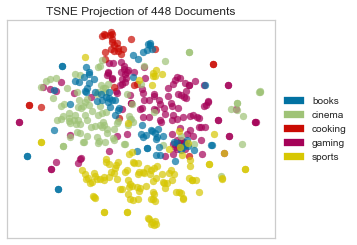

In [11]:
visualize('t-sne','tfidf',corpus)

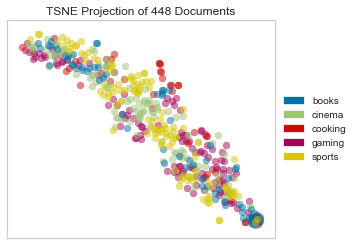

In [13]:
visualize('t-sne','count',corpus,alpha = 0.5)

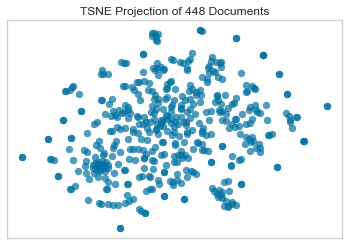

In [14]:
visualize('t-sne','tfidf',corpus,labels =False)

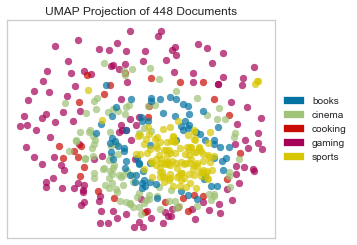

In [15]:
visualize('umap','tfidf',corpus)

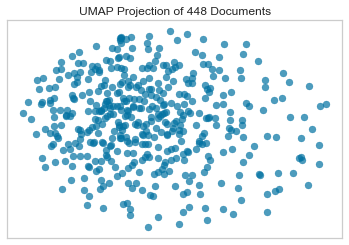

In [63]:
visualize('umap','tfidf',corpus,labels = False)

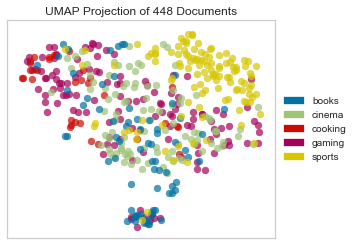

In [16]:
visualize('umap','count',corpus,metric= 'cosine')